# Dataset: [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv)

## EXPLORATORY DATA ANALYSIS

Deskripsi Variabel Data:<br>
- id : ID unik untuk pelanggan
- Gender : Jenis kelamin pelanggan
- Age : Usia pelanggan
- Driving_License : 0 - Pelanggan tidak memiliki SIM, 1 - Pelanggan sudah memiliki SIM
- Region_Code : Kode unik untuk wilayah pelanggan
- Previously_Insured 1 : Pelanggan sudah memiliki Asuransi Kendaraan, 0 : Pelanggan tidak memiliki Asuransi Kendaraan
- Vehicle_Age : Usia Kendaraan (dengan kategori 1-2 Year, \< 1 Year, dan \> 2 Years)
- Vehicle_Damage : 1 - Pelanggan sudah pernah mengalami kerusakan kendaraan, 0 - Pelanggan belum pernah mengalami kerusakan kendaraan.
- Annual_Premium : Jumlah premi yang harus dibayarkan pelanggan dalam setahun
- Policy_Sales_Channel : Kode anonim untuk saluran penghubung ke pelanggan, yaitu berbeda Agen, Melalui Surat, Melalui Telepon, Tatap Muka, dll.
- Vintage : Jumlah hari, pelanggan yang sudah terkait dengan perusahaan
- Response : 1 - Pelanggan tertarik, 0 - Pelanggan tidak tertarik

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib import rcParams

In [ ]:
rcParams["figure.figsize"]= (10,7)
rcParams["lines.linewidth"]= 2.5
rcParams["xtick.labelsize"]= "x-large"
rcParams["ytick.labelsize"]= "x-large"

In [ ]:
# import dataset
train = pd.read_csv("train.csv")
df = train.copy()

# 1. Descriptive Statistics
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai

## Checking column, NULL VALUES, Unique and Dtypes

Pengecekkan tipe data setiap kolom dan jumlah nilai yang kosong/hilang. 

In [ ]:
df.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113253 entries, 0 to 113252
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113253 non-null  int64  
 1   Gender                113253 non-null  object 
 2   Age                   113253 non-null  int64  
 3   Driving_License       113253 non-null  int64  
 4   Region_Code           113253 non-null  float64
 5   Previously_Insured    113253 non-null  int64  
 6   Vehicle_Age           113253 non-null  object 
 7   Vehicle_Damage        113253 non-null  object 
 8   Annual_Premium        113252 non-null  float64
 9   Policy_Sales_Channel  113252 non-null  float64
 10  Vintage               113252 non-null  float64
 11  Response              113252 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 10.4+ MB


**Dari data diatas:**
- Data terdiri dari 381109 baris dan 12 kolom.
- Terdapat 2 jenis data dalam dataset, yaitu data numerik (int64 dan float64) dan data kategorikal (object).
- Tidak ada kolom yang memiliki nilai kosong (terlihat dari non-null count pada setiap kolom sama, yaitu 381109).
- Tidak ada data null, sehingga tidak perlu dilakukan handling value null.
- Tidak ada kolom yang memiliki nilai summary yang aneh. Semua nilai summary pada kolom numerik seperti Age, Region_Code, Annual_Premium, Policy_Sales_Channel, dan Vintage terlihat wajar dan sesuai dengan ekspektasi. Selain itu, kolom kategorikal seperti Gender, Driving_License, Previously_Insured, Vehicle_Age, dan Vehicle_Damage juga memiliki nilai summary yang konsisten dengan tipe datanya.
- Untuk Region_Code, dan Policy_Sales_Channel perlu disesuaikan kembali type datanya menjadi object.

In [ ]:
# penyesuaian tipe data kolom yang diperlukan
df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]] = df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]].astype(object)
df.info() # pengecekkan tipe data kembali

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113253 entries, 0 to 113252
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113253 non-null  object 
 1   Gender                113253 non-null  object 
 2   Age                   113253 non-null  int64  
 3   Driving_License       113253 non-null  object 
 4   Region_Code           113253 non-null  object 
 5   Previously_Insured    113253 non-null  object 
 6   Vehicle_Age           113253 non-null  object 
 7   Vehicle_Damage        113253 non-null  object 
 8   Annual_Premium        113252 non-null  float64
 9   Policy_Sales_Channel  113252 non-null  object 
 10  Vintage               113252 non-null  float64
 11  Response              113252 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.4+ MB


In [ ]:
# pembuktian kolom kosong
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

**Tidak ada kolom yang memiliki nilai kosong pada dataset.**

In [ ]:
# mencari jumlah unique value di tiap kolom
df.nunique()

id                      113253
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           34802
Policy_Sales_Channel       139
Vintage                    290
Response                     2
dtype: int64

**Dari data diatas**
- Kolom Age memiliki 66 unique value, yang menunjukkan variasi usia yang cukup luas pada dataset ini.
- Kolom Region_Code memiliki 53 unique value, yang menunjukkan variasi region yang cukup luas pada dataset ini.
- Kolom Policy_Sales_Channel memiliki 155 unique value, yang menunjukkan variasi channel penjualan asuransi kendaraan yang cukup luas pada dataset ini.
- Kolom Vintage memiliki 290 unique value, yang menunjukkan variasi lama menjadi pelanggan pada dataset ini.

## Separate Columns

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
 # Pengelompokan kolom berdasarkan jenisnya
nums = ['Age','Annual_Premium','Vintage']
cats =['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Response']

## Statistical Summary (Numericals)

In [ ]:
df[nums].describe().round(2)

,Age,Annual_Premium,Vintage
count,113253.00,113252.00,113252.00
mean,38.81,30460.74,154.36
std,15.48,17150.70,83.81
min,20.00,2630.00,10.00
25%,25.00,24330.00,82.00
50%,36.00,31613.00,154.00
75%,49.00,39362.50,227.00
max,85.00,540165.00,299.00


**Dari data diatas, dapat disimpulkan:**
-   Rata-rata usia nasabah adalah 38.82 tahun.
-   Rata-rata premi tahunan yang dibayar oleh nasabah adalah 30,564.39.
-   Rata-rata jumlah hari sejak nasabah bergabung dengan perusahaan asuransi (vintage) adalah 154.35 hari.
-   Standar deviasi usia nasabah adalah 15.51 tahun.
-   Standar deviasi premi tahunan adalah 17,213.16.
-   Standar deviasi vintage adalah 83.67 hari.
-   Usia nasabah termuda adalah 20 tahun dan yang tertua adalah 85 tahun.
-   Premi tahunan terendah yang dibayarkan oleh nasabah adalah 2,630 dan tertinggi adalah 540,165.
-   Rata-rata vintage untuk nasabah berada di sekitar 154 hari.
-   Kuartil pertama dari usia nasabah adalah 25 tahun dan kuartil ketiga adalah 49 tahun. Hal ini menunjukkan bahwa sebagian besar nasabah berada di rentang usia antara 25 dan 49 tahun.
-   Kuartil pertama dari premi tahunan adalah 24,405 dan kuartil ketiga adalah 39,400. Ini menunjukkan bahwa sebagian besar nasabah membayar premi dalam rentang antara 24,405 dan 39,400.
-   Kuartil pertama dari vintage adalah 82 hari dan kuartil ketiga adalah 227 hari. Ini menunjukkan bahwa sebagian besar nasabah telah bergabung dengan perusahaan asuransi selama rentang waktu antara 82 dan 227 hari.
- Nilai Mean dan Median (50%) tidak terdapat keanehan dikarenakan nilainya tidak terlalu jauh.
- Nilai Min dan Max tidak terdapat keanehan, dikarenakan rentangnya yang masih masuk akal dari tiap fitur.


## Statistical Summary (Categoricals)

In [ ]:
df[cats].describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,113253,113253,113253.0,113253,113253,113253,113252.0,113252.0
unique,2,2,53.0,2,3,2,139.0,2.0
top,Male,1,28.0,0,1-2 Year,Yes,152.0,0.0
freq,61049,113032,31830.0,61550,59465,57347,40078.0,99307.0


**Dari hasil di atas, kita dapat menemukan beberapa insight seperti:**

- Gender: mayoritas pemegang polis adalah pria dengan jumlah 206.089, sedangkan wanita hanya 174.020.
- Driving License: hampir semua pemegang polis memiliki lisensi mengemudi dengan hanya sedikit pemegang polis yang tidak memiliki lisensi mengemudi (380297 nasabah memiliki SIM dan 812 nasabah tidak memiliki SIM).
- 'Driving_License' memiliki nilai minimum 0 dan maksimum 1, yang menunjukkan bahwa fitur tersebut hanya memiliki 2 nilai unik. Sebanyak 99.79% nasabah memiliki surat izin mengemudi.
- Region Code: terdapat 53 region code yang berbeda dengan region code 28 yang paling banyak digunakan oleh pemegang polis.
- Previously Insured: sebanyak 206.481 pemegang polis sebelumnya tidak memiliki asuransi kendaraan dan 174,628 nasabah lainnya sudah memiliki asuransi kendaraan sebelumnya.
- Terdapat 155 saluran penjualan kebijakan (Policy_Sales_Channel) yang digunakan untuk menjual produk asuransi kepada nasabah.
- Vehicle Age: mayoritas kendaraan yang diasuransikan adalah kendaraan berusia 1-2 tahun dengan jumlah 200.316.
- Vehicle Damage: mayoritas kendaraan yang diasuransikan mengalami kerusakan sebelumnya dengan jumlah 192.413, sementara sisanya, 188,696 nasabah memiliki kendaraan yang belum pernah mengalami kerusakan.
- Policy Sales Channel: terdapat 155 channel penjualan yang digunakan dengan channel penjualan 152 paling banyak digunakan.
- Response: mayoritas pemegang polis tidak merespons kampanye pemasaran asuransi kendaraan dengan hanya sedikit yang merespons.
- Statistik dari Unique, Top, dan Freq  tidak terdapat keanehan, karena dari masing-masing fitur sudah memiliki kategori yang sesuai, nilai top dan frekuensi yang sesuai. Seperti Gender (Male dan Female; Top nya adalah Male dengan Frekuensi 206.089), Region_Code (ada 53 ragam daerah, dengan Top di daerah ke-58 dengan frekuensi sebanyak 106.415), 
- Driving_License, Region_Code, Previously_Insured, Policy_Sales_Channel memiliki proporsi frekuensi top yang signifikan.

## Value Counting (Categoricals)

In [ ]:
cats = {cat: None for cat in cats}
cats.pop('Region_Code')
cats.pop('Policy_Sales_Channel')

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()


Value count kolom Gender:
Male      61049
Female    52204
Name: Gender, dtype: int64

Value count kolom Driving_License:
1    113032
0       221
Name: Driving_License, dtype: int64

Value count kolom Previously_Insured:
0    61550
1    51703
Name: Previously_Insured, dtype: int64

Value count kolom Vehicle_Age:
1-2 Year     59465
< 1 Year     49038
> 2 Years     4750
Name: Vehicle_Age, dtype: int64

Value count kolom Vehicle_Damage:
Yes    57347
No     55906
Name: Vehicle_Damage, dtype: int64

Value count kolom Response:
0.0    99307
1.0    13945
Name: Response, dtype: int64



**Kesimpulan:**
- Terdapat lebih banyak pemegang polis pria (206.089) daripada wanita (175.020).
- Hampir semua pemegang polis (99,79%) memiliki Surat Izin Mengemudi (Driving License).
- Sebagian besar pemegang polis (54,14%) belum pernah diasuransikan sebelumnya (Previously Insured=0).
- Sebagian besar kendaraan yang diasuransikan berusia 1-2 tahun (52,53%), diikuti oleh kendaraan yang berusia kurang dari 1 tahun (43,20%) dan kendaraan yang berusia lebih dari 2 tahun (4,21%).
- Sebagian besar kendaraan yang diasuransikan mengalami kerusakan (Vehicle Damage=Yes).
- Hanya sebagian kecil dari pemegang polis yang memberikan respons terhadap penawaran asuransi (Response=1), yaitu sekitar 12,24%.

# 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

## Individual Boxplots (Numericals)

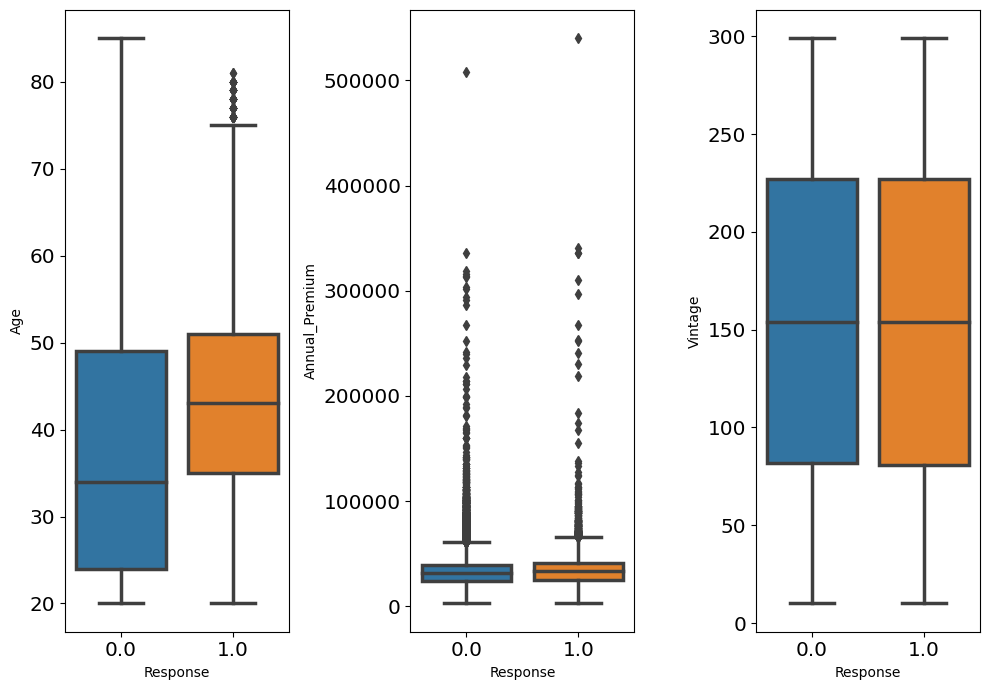

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],x=df["Response"], orient="v")
    plt.tight_layout()

**Terdapat cukup banyak outliers yang ditunjukkan plot diatas. Kemudian akan mencari banyaknya nilai outlier pada fitur annual_premium dengan menggunakan metode yaitu interquartile range (IQR).**

In [ ]:
# Metode IQR (Interquartile Range) pada kolom 'Annual_Premium'
Q1 = np.percentile(df["Annual_Premium"], 25)
Q3 = np.percentile(df["Annual_Premium"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df["Annual_Premium"] < lower_bound) | (df["Annual_Premium"] > upper_bound)]
outliers.shape
print("Terdapat outlier pada kolom 'Annual_Premium' dengan jumlah", outliers.shape[0])

Terdapat outlier pada kolom 'Annual_Premium' dengan jumlah 0


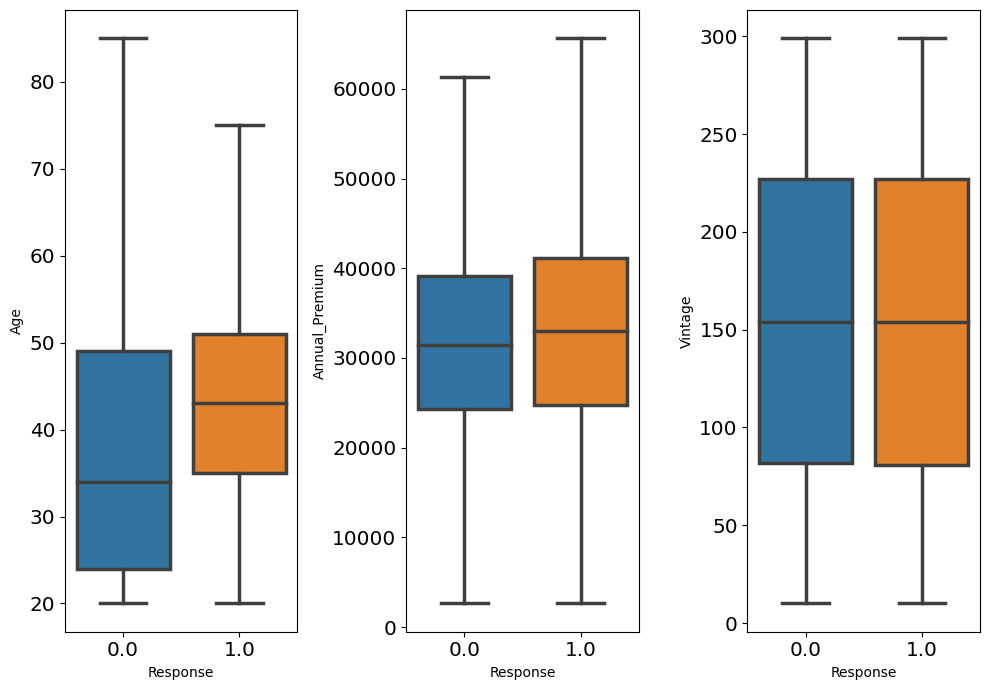

In [ ]:
# menampilkan boxplot dengan mengabaikan outliers untuk mempermudah pembacaan data
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],x=df["Response"], orient="v", showfliers=False)
    plt.tight_layout()

Berdasarkan boxplot yang dihasilkan, dapat dilihat bahwa terdapat beberapa variabel yang memiliki perbedaan yang cukup signifikan antara pelanggan yang memberikan respons tertarik dan pelanggan yang memberikan respons tidak tertarik:
- Variabel Age yang tidak tertarik menggunakan asuransi kendaraan sebagian besar berada direntang umur 20-30 tahun (Response 0), sedangkan yang tertarik (Response 1) sebagian besar direntang 40-50 tahun.
- Variabel Annual_Premium baik yang tertarik maupun tidak tertarik berada direntang 25.000 - 40.000.
- Variabel Vintage memiliki distribusi yang hampir sama antara yang tertarik dengan yang tidak tertarik.

## Individual Displot (Numericals)

<ipython-input-39-0c747d79bed7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-39-0c747d79bed7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-39-0c747d79bed7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


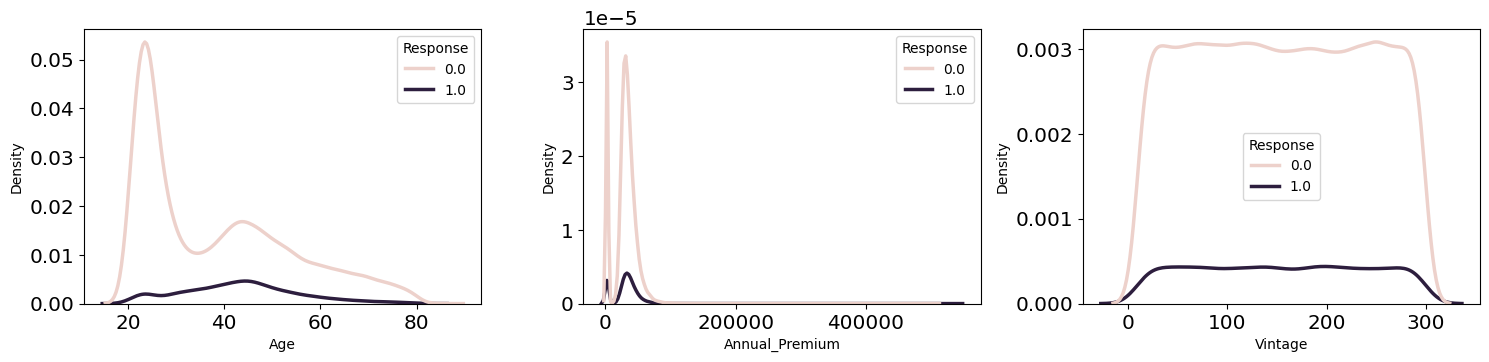

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,10))

for i in range(0, len(nums)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[nums[i]], hue=df['Response'])

plt.xlabel(nums[i])
plt.tight_layout()


Berdasarkan density plot di atas, dapat dilihat bahwa distribusi variabel 'Age' dan 'Annual_Premium' untuk kedua kelas 'Response' terlihat serupa, sedangkan distribusi variabel 'Vintage' terlihat sedikit berbeda antara kedua kelas 'Response'.

-   Age: Distribusi umur peserta asuransi cenderung skew ke kanan dengan puncak distribusi berada pada rentang usia 20-30 tahun. Pada kelompok yang tidak tertarik mengambil asuransi, terdapat sedikit peningkatan jumlah peserta pada rentang usia 40-50 tahun.
-   Annual_Premium: Distribusi premi tahunan cenderung skew ke kanan, dengan mayoritas premi berada pada rentang di bawah 50.000. Pada kelompok yang tertarik mengambil asuransi, terdapat sedikit peningkatan jumlah peserta pada rentang premi yang lebih tinggi.
-   Vintage: Distribusi masa berlangganan cenderung berbentuk bell-shaped atau normal distribution dengan puncak distribusi berada pada rentang masa berlangganan 150-200 hari. Pada kelompok yang tidak tertarik mengambil asuransi, terdapat sedikit penurunan jumlah peserta pada rentang masa berlangganan yang lebih panjang.

## Alternatif: Individual Violin Plots (Numericals)

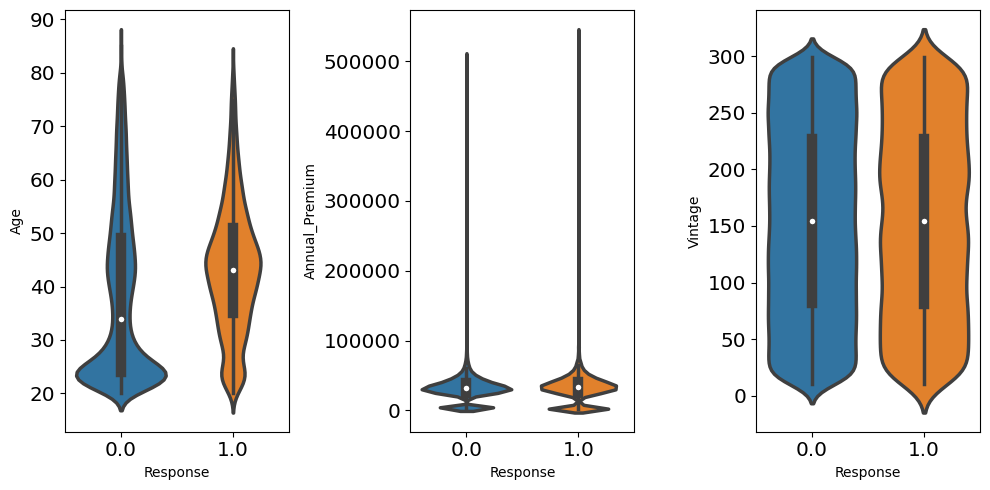

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(10,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], x=df['Response'])
        
plt.tight_layout()

Berdasarkan output violin plot dari kode tersebut, dapat disimpulkan bahwa:

-   Variabel Age memiliki distribusi yang hampir sama antara yang tidak memiliki respon (Response 0) dengan yang memiliki respon (Response 1).
-   Variabel Annual_Premium memiliki distribusi yang lebih condong ke nilai yang lebih rendah untuk yang tidak memiliki respon, sedangkan yang memiliki respon memiliki distribusi yang lebih merata.
-   Variabel Vintage memiliki distribusi yang hampir sama antara yang tidak memiliki respon dengan yang memiliki respon.

## Individual Countplot (Categoricals)

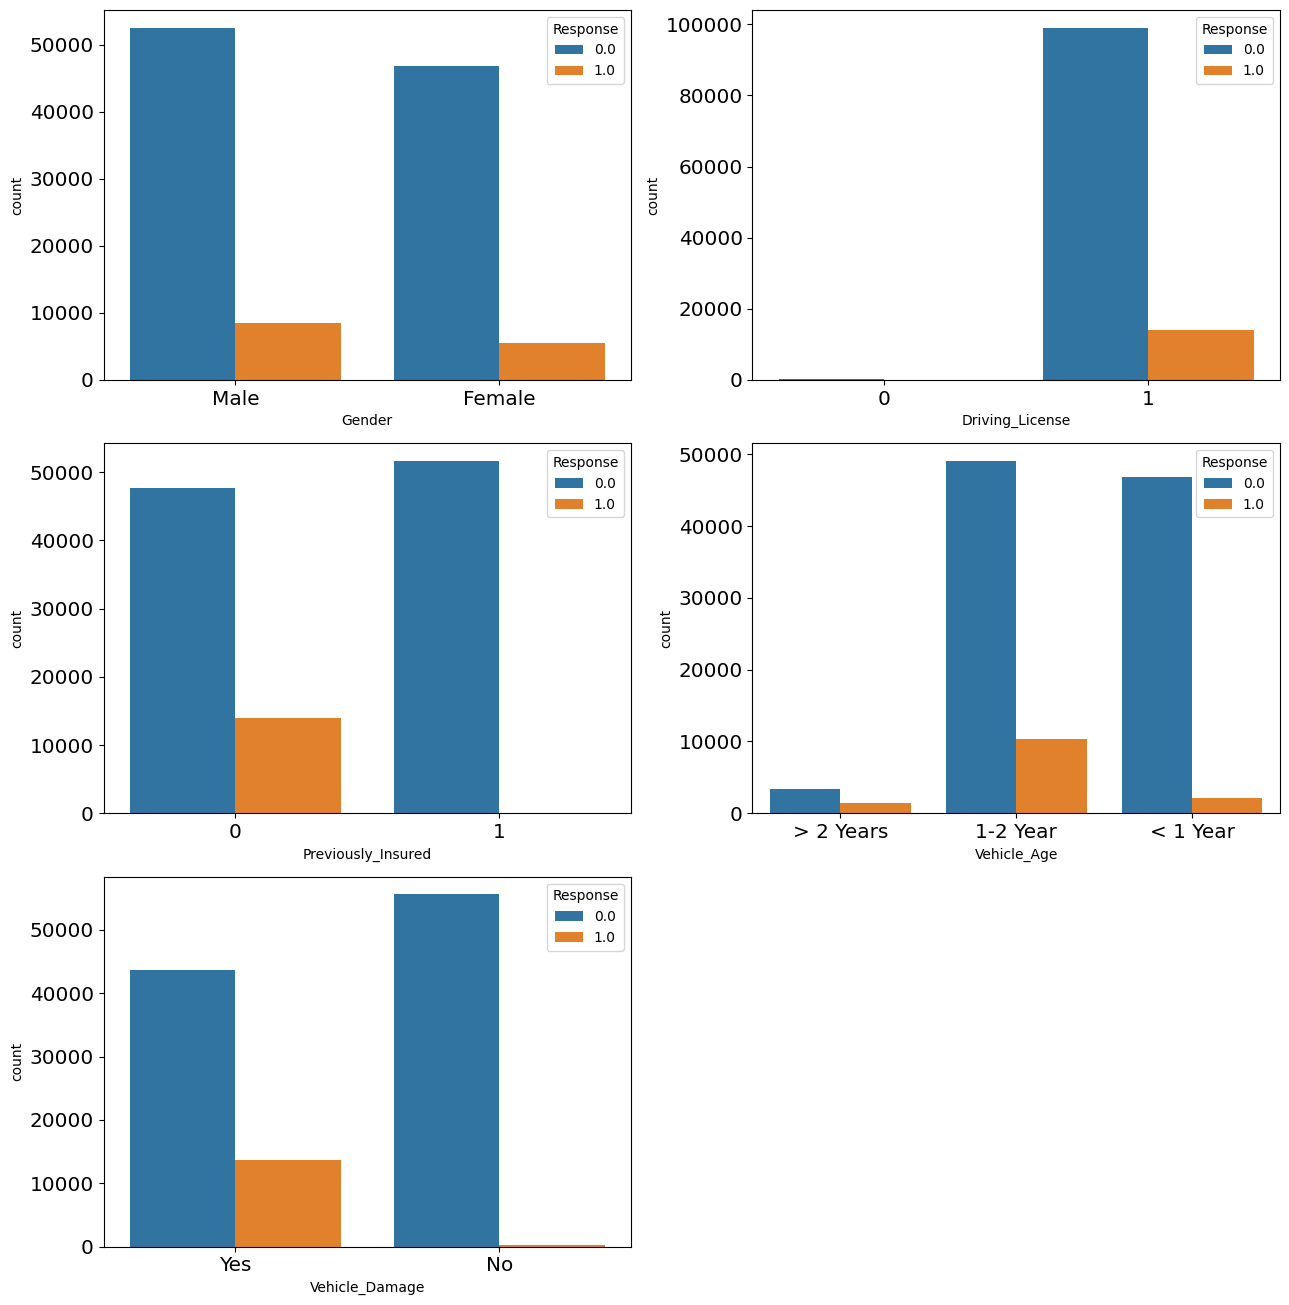

In [ ]:
# mengelompokkan sebagian kolom kategorikal, terutama yang memiliki kategori tidak banyak, untuk ditampilkan kedalam plot sekaligus
part_cats = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

for i in range(0, len(part_cats)):
    plt.rcParams['figure.figsize'] = (13,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[part_cats[i]], hue=df['Response'])
    plt.tight_layout()

Plot-count ini memvisualisasikan distribusi jumlah polis yang terjual (dengan Response = 1) dan tidak terjual (dengan Response = 0) untuk setiap kategori dalam variabel Gender, Driving_License, Previously_Insured, Vehicle_Age, dan Vehicle_Damage.

-   Untuk variabel Gender, jumlah laki-laki yang memiliki asuransi lebih banyak dibandingkan perempuan, namun perbedaan jumlah tersebut tidak terlalu signifikan.
-   Untuk variabel Driving_License, hampir semua pelanggan memiliki lisensi mengemudi yang valid dan yang tertarik memiliki asuransi lebih sedikit dibandingkan yang tidak tertarik.
-   Untuk variabel Previously_Insured, orang yang yang sebelumnya sudah memiliki asuransi, tidak terlalu respon terhadap penawaran asuransi lagi
-   Untuk variabel Vehicle_Age, kendaraan usia 1-2 tahun lebih cenderung diasuransikan, sedangkan kendaraan usia\> 2 tahun kurang diasuransikan.
-   Untuk variabel Vehicle_Damage, orang yang kendaraannya rusak sebelumnya lebih cenderung membeli asuransi.

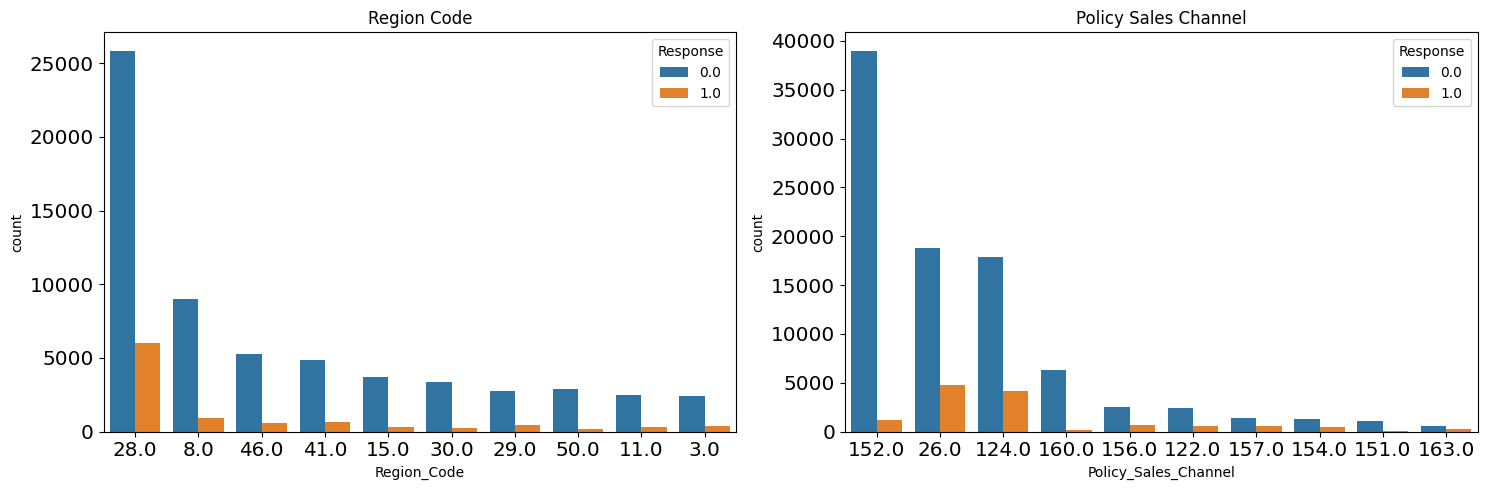

In [ ]:
# menampilkan plot kolom lainnya
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.countplot(x='Region_Code', hue='Response', data=df, order = df['Region_Code'].value_counts().iloc[:10].index, ax=axes[0])
sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df, order = df['Policy_Sales_Channel'].value_counts().iloc[:10].index, ax=axes[1])

axes[0].set_title('Region Code')
axes[1].set_title('Policy Sales Channel')

plt.tight_layout()
plt.show()

# 3. Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

Terdapat beberapa Region_Code yang memiliki jumlah pelanggan yang lebih banyak dan berpotensi lebih besar untuk membeli asuransi daripada yang lain. Policy Sales Channel dengan nomor 26 memiliki jumlah pelanggan yang paling banyak dan berpotensi lebih besar untuk membeli asuransi daripada Policy Sales Channel yang lain. Selain itu, beberapa Policy Sales Channel lain juga memiliki jumlah pelanggan yang signifikan dan berpotensi besar untuk membeli asuransi.

Follow-up Pre-Processing

- Memproses outlier.
Untuk features yg sebagian besar datanya merupakan outlier jika seandainya pada tahap preprocessing diputuskan untuk melakukan pembersihan terhadap outlier tersebut, sebaiknya dilakukan dengan menetapkan sebuah treshold. Misalkan dengan menetapkan treshold yaitu percentile 95% atau 99%. Sehingga dengan demikian data yang terbuang akibat preprocessing outlier tidak terlalu banyak.
- Menstandarisasi kolom yang jauh dari distribusi normal.
- Menangani data categorical dengan feature encoding.
- Menangani ketidakseimbangan kelas pada kolom Response sebagai target.
Mayoritas data customer memilih "0" untuk Response (dengan frekuensi 334399 dari 381109 data yang ada). Dimana artinya data customer yang memilih "1" hanya sekitar 12% dari total data. Hal ini tentunya menjadi suatu permasalahan dikarenakan dapat membuat model menjadi overfit. Harus dilakukan oversampling.
- Mengambil top 10 atau top 15 dari kolom Policy_Sales_Channel dan Region_Code serta mengubah sisanya menjadi Others.


## Correlation Heatmap (Numericals)

In [ ]:
df_new = train.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113253 entries, 0 to 113252
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113253 non-null  int64  
 1   Gender                113253 non-null  object 
 2   Age                   113253 non-null  int64  
 3   Driving_License       113253 non-null  int64  
 4   Region_Code           113253 non-null  float64
 5   Previously_Insured    113253 non-null  int64  
 6   Vehicle_Age           113253 non-null  object 
 7   Vehicle_Damage        113253 non-null  object 
 8   Annual_Premium        113252 non-null  float64
 9   Policy_Sales_Channel  113252 non-null  float64
 10  Vintage               113252 non-null  float64
 11  Response              113252 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 10.4+ MB


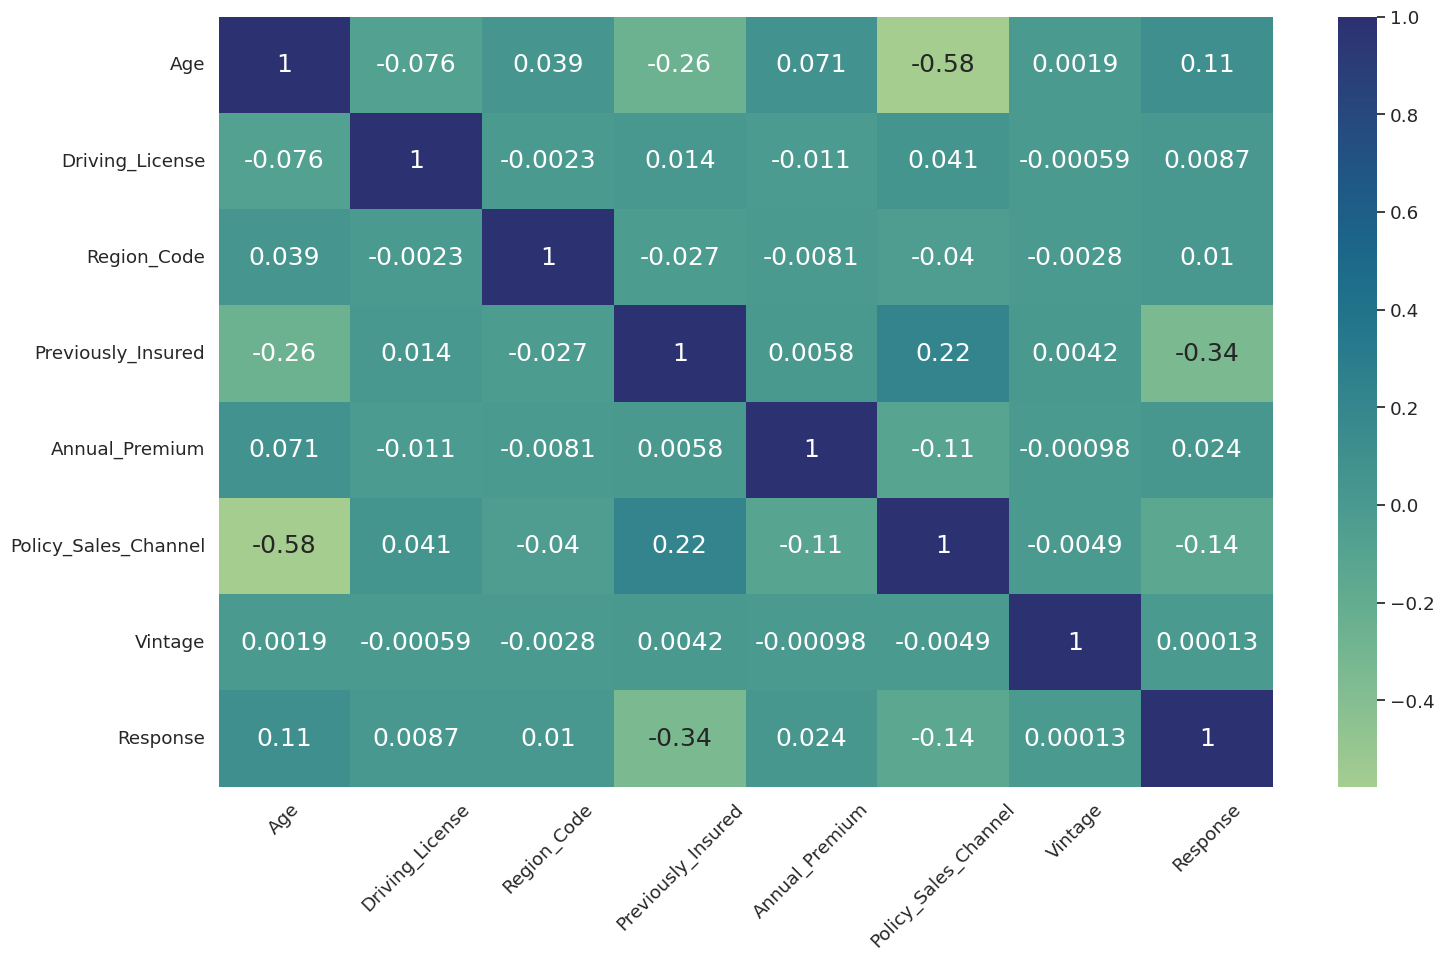

In [ ]:
dfcorr = df_new.drop('id', axis=1)
plt.figure(figsize=(17,10))
sns.set(font_scale=1.2)
sns.heatmap(dfcorr.corr(),cmap="crest",annot=True,annot_kws={"size": 18})
plt.xticks(rotation = 45)
plt.show()

- Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7
-   Usia `(Age)` memiliki korelasi positif yang cukup kuat dengan Response (+0.11). Artinya semakin tua seseorang, semakin besar kemungkinan mereka membeli asuransi.
-   Ada korelasi negatif yang cukup kuat antara `Previously_Insured` dan `Response` (-0.34), yang menunjukkan bahwa orang yang tidak memiliki asuransi sebelumnya lebih mungkin untuk membeli asuransi.
-   Ada juga korelasi positif yang cukup kuat antara `Vehicle_Damage` dan `Response` (+0.35), yang menunjukkan bahwa orang yang kendaraannya pernah rusak lebih mungkin untuk membeli asuransi.
-   Variabel `Region_Code` dan `Policy_Sales_Channel` memiliki korelasi rendah dengan Response. Hal ini menunjukkan bahwa region dan saluran penjualan asuransi tidak mempengaruhi secara signifikan keputusan orang untuk membeli asuransi atau tidak.

## Stripplot Analysis (Categoricals-Numericals)

<Axes: xlabel='Vehicle_Damage', ylabel='Vintage'>

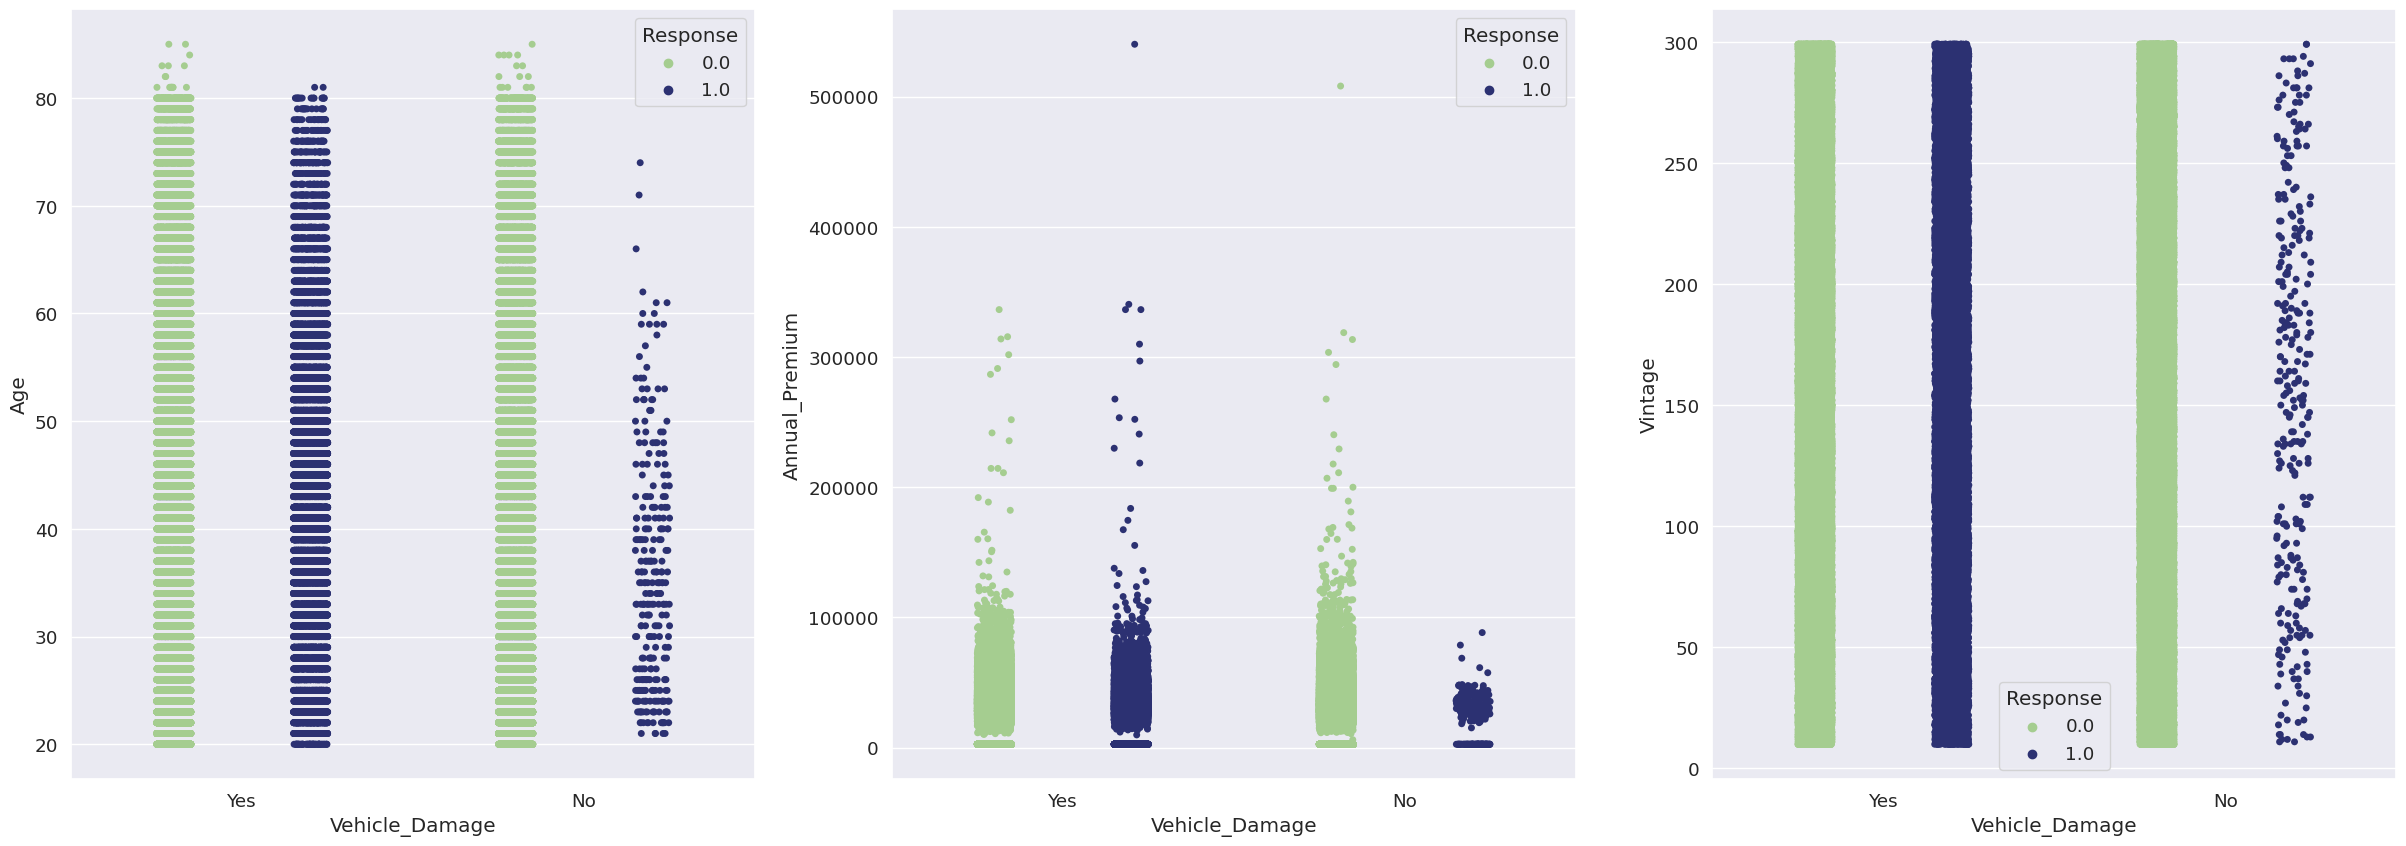

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Damage", y="Vintage", hue='Response',dodge=True, palette='crest')

- Dari plot stripplot pertama, dapat dilihat bahwa pelanggan yang mempunyai kendaraan yang rusak (Yes) dan berusia lebih dari 50 tahun memiliki peluang lebih besar untuk membeli asuransi kendaraan dibandingkan dengan pelanggan yang berusia di bawah 50 tahun. Hal ini dapat menjadi informasi yang berguna dalam menentukan target pelanggan yang akan dipasarkan.
- Pelanggan yang mengalami kerusakan pada kendaraannya (Vehicle_Damage = Yes) cenderung lebih tinggi kemungkinannya untuk membeli asuransi (Response = 1) dibandingkan dengan pelanggan yang tidak mengalami kerusakan pada kendaraannya (Vehicle_Damage = No).
- Pelanggan yang membeli asuransi (Response = 1) cenderung memiliki Annual_Premium yang lebih tinggi daripada pelanggan yang tidak membeli asuransi (Response = 0).
- Tidak ada perbedaan yang signifikan dalam Vintage (jumlah hari sejak pelanggan bergabung dengan perusahaan) antara pelanggan yang membeli asuransi dan pelanggan yang tidak membeli asuransi, baik pada kelompok Vehicle_Damage = Yes maupun Vehicle_Damage = No.
- Customer yang tidak memiliki kerusakan pada kendaraan cenderung tidak tertarik menggunakan produk asuransi kendaraan.

<Axes: xlabel='Vehicle_Age', ylabel='Vintage'>

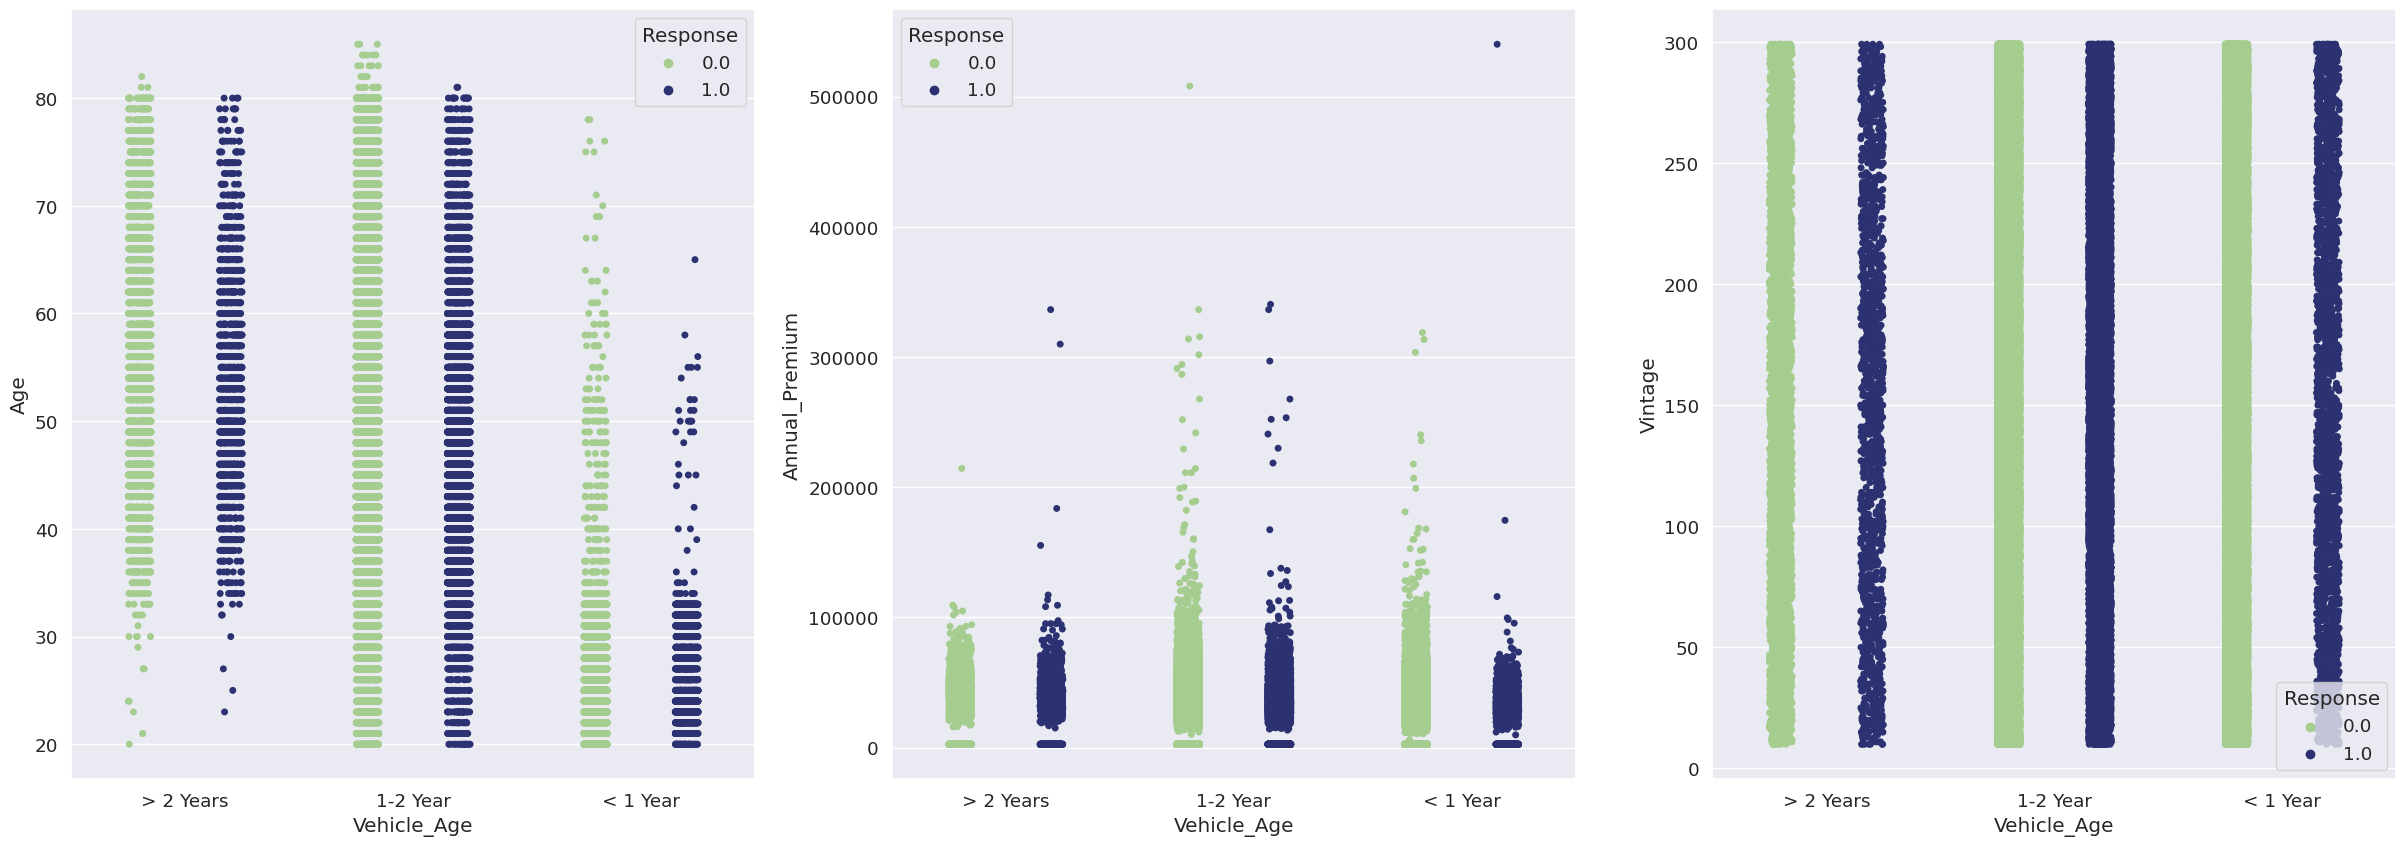

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Age", y="Vintage", hue='Response',dodge=True, palette='crest')

Dari plot-stripplot tersebut, dapat dilihat bahwa:

-   Umumnya pelanggan yang merespons dengan 1 (membeli asuransi) memiliki usia lebih rendah daripada pelanggan yang merespons dengan 0 (tidak membeli asuransi) untuk setiap kategori umur kendaraan.
-   Pelanggan dengan annual premium yang lebih tinggi cenderung merespons dengan 1 untuk setiap kategori umur kendaraan.
-   Tidak ada korelasi yang jelas antara umur kendaraan dengan masa lalu pelanggan dan responsnya.

<Axes: xlabel='Gender', ylabel='Vintage'>

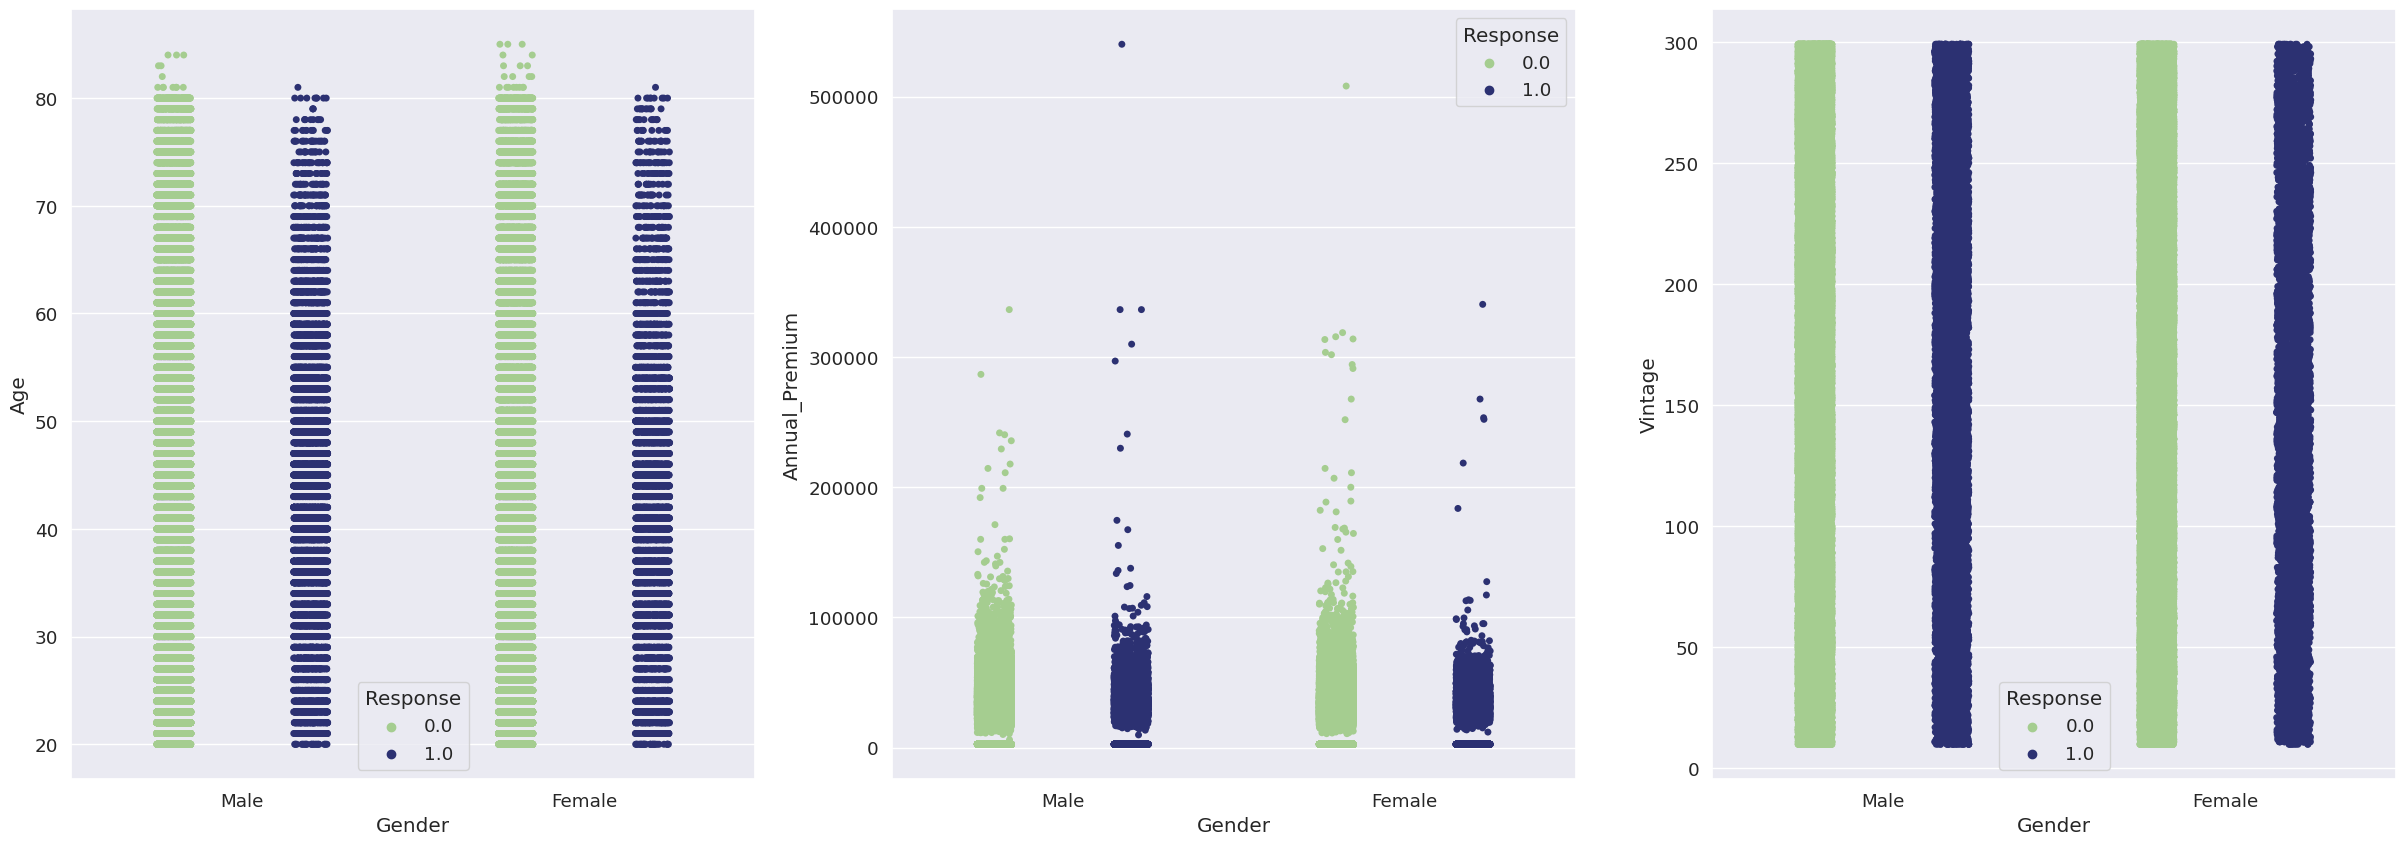

In [ ]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Gender", y="Vintage", hue='Response',dodge=True, palette='crest')

-   Menunjukkan bahwa tidak terdapat perbedaan signifikan dalam distribusi usia antara gender dalam hal respon terhadap asuransi.
-   Menunjukkan bahwa pria dan wanita memiliki distribusi premi tahunan yang berbeda secara signifikan dalam hal respon terhadap asuransi, dengan wanita cenderung membayar premi yang lebih rendah.
-   Tidak terdapat perbedaan signifikan dalam distribusi jumlah hari vintage antara gender dalam hal respon terhadap asuransi.

# 4. Business Insight
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

### Business Insight 1
**Insight**: Pelanggan dengan polis asuransi kendaraan yang lebih lama (Vehicle_Age > 2 tahun) cenderung lebih jarang merespon tawaran asuransi kendaraan baru dibandingkan pelanggan dengan polis kendaraan yang lebih baru. <br>
**Rekomendasi**: Perusahaan asuransi perlu melakukan kampanye pemasaran khusus untuk pelanggan dengan polis kendaraan yang lebih lama untuk mendorong mereka untuk mempertimbangkan untuk membeli polis asuransi kendaraan baru. Kampanye tersebut bisa dilakukan melalui media sosial, email marketing, atau telepon langsung.

### Business Insight 2
**Insight**: Pelanggan dengan kecelakaan kendaraan di masa lalu cenderung lebih memilih untuk membeli polis asuransi kendaraan yang lebih lengkap dengan manfaat tambahan seperti asuransi kesehatan dan asuransi kecelakaan diri. <br>
**Rekomendasi**: Perusahaan asuransi dapat menargetkan pelanggan yang pernah mengalami kecelakaan kendaraan dengan paket asuransi kendaraan yang lebih lengkap. Perusahaan dapat menambahkan manfaat tambahan seperti asuransi kesehatan dan asuransi kecelakaan diri pada paket ini untuk menarik minat pelanggan. Selain itu, perusahaan juga dapat mempertimbangkan untuk menawarkan diskon atau promosi khusus untuk pelanggan yang membeli paket asuransi kendaraan lengkap.

### Business Insight 3
**Insight**: Wilayah-wilayah dengan Region_Code 28.0, 41.0, 8.0, 46.0, dan 29.0 memiliki tingkat minat yang lebih tinggi dalam menggunakan asuransi kendaraan. <br>
**Rekomendasi**: Untuk meningkatkan kepercayaan dan minat masyarakat dalam menggunakan asuransi kendaraan di wilayah-wilayah tersebut, perusahaan dapat melakukan kampanye pemasaran yang lebih intensif dan menawarkan program-program khusus yang menarik bagi nasabah di wilayah tersebut. Selain itu, perusahaan juga perlu melakukan analisis lebih lanjut terkait faktor-faktor apa yang membuat nasabah di wilayah-wilayah tersebut lebih tertarik pada asuransi kendaraan. Analisis tersebut dapat digunakan sebagai dasar dalam pengembangan produk dan strategi pemasaran yang lebih efektif.

### Business Insight 4

**Insight**: Lebih banyak kendaraan yang diasuransikan berusia antara 1-2 tahun
dibandingkan kendaraan dengan usia lebih dari 2 tahun. Hal ini
menunjukkan bahwa kendaraan dengan usia tersebut masih banyak digunakan
dan dianggap berharga oleh pemiliknya.
<br>
**Rekomendasi**: Perusahaan dapat menargetkan poromsi kepada pemilik kendaraan yang kendaraannya berusia 1-2 tahun.

### Business Insight 5
**Insight**: Customer dengan usia antara 20-30 tahun lebih sering menolak penawaran asuransi daripada responden dengan usia di atas 30 tahun. 
<br>
**Rekomendasi**: Hal ini dapat menjadi pertimbangan bagi perusahaan asuransi untuk menyesuaikan penawaran asuransi sesuai dengan profil usia pelanggan.

### Business Insight 6
**Insight**: Customer dengan jenis kelamin laki-laki cenderung membayar premi
asuransi yang lebih tinggi daripada responden perempuan. Ini mungkin
karena perempuan cenderung lebih hati-hati dalam mengemudi dan memilih
kendaraan yang lebih aman.
<br>
**Rekomendasi**: Lebih fokus pada pelanggan laki-laki untuk meningkatkan pendapatan perusahaan.

### Business Insight 7

**Insight**: Customer dengan lama kepemilikan kendaraan kurang dari 100 hari
cenderung lebih cenderung menerima penawaran asuransi daripada customer
dengan lama kepemilikan kendaraan yang lebih lama. 
<br>
**Rekomendasi**: Hal ini dapat menjadi
pertimbangan bagi perusahaan asuransi untuk mengubah strategi pemasaran
mereka untuk menargetkan pelanggan yang baru membeli kendaraan.

# 5. GIT



GitHub Link - [Stage 1 - A Six](https://github.com/gsyafwan/Health-Insurance-by-A-Six)